# saving example

---

this notebook is to try the built in tensorflow model saving features.

In [24]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import numpy as np
np.set_printoptions(threshold=np.nan)
import tensorflow as tf
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import progressbar
import iqa_tools

In [4]:
sess = tf.Session()
new_saver = tf.train.import_meta_graph('ssimNET300.meta')
new_saver.restore(sess, tf.train.latest_checkpoint('./'))

INFO:tensorflow:Restoring parameters from ./ssimNET300


In [17]:
graph = tf.get_default_graph()
op_restore = graph.get_tensor_by_name('BiasAdd_4:0')
x = graph.get_tensor_by_name('Placeholder:0')

In [13]:
data_path = '/home/dirty_mike/Dropbox/github/image_quality_analysis/data/sample_data/'
train_features, train_target, test_features, test_target = iqa_tools.load_data(local=True, path=data_path)

In [18]:
train_features.shape

(500, 96, 96, 4)

In [20]:
pred = sess.run(op_restore, feed_dict={x: train_features})

In [22]:
pred.shape

(500, 86, 86, 1)

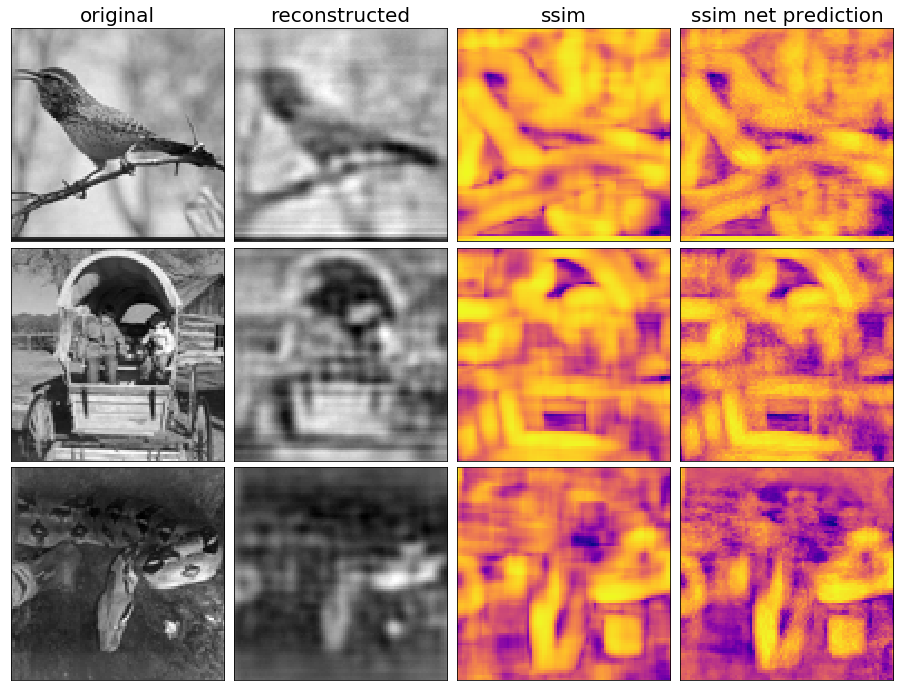

In [35]:
plt.figure(figsize = (16,12))
gs1 = gridspec.GridSpec(3, 4)
gs1.update(wspace=0, hspace=0.03)

for j in range(3):
    index = np.random.randint(500)
    ax1, ax2, ax3, ax4 = plt.subplot(gs1[4*j]), plt.subplot(gs1[4*j+1]), plt.subplot(gs1[4*j+2]), plt.subplot(gs1[4*j+3])
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    if j == 0:
        ax1.set_title('original', size=20)
        ax2.set_title('reconstructed', size=20)
        ax3.set_title('ssim', size=20)
        ax4.set_title('ssim net prediction', size=20)

    ax1.imshow(train_features[index,:,:,0], cmap='gray')
    ax2.imshow(train_features[index,:,:,1], cmap='gray')
    ax3.imshow(train_target[index,:,:,0], cmap='plasma')
    ax4.imshow(pred[index,:,:,0], cmap='plasma')
plt.show()

dooooopppppeee